# Data Preprocessing

### Lower Case

An important first step in working with text data is simply converting it into lowercase. Why do we do this? Well, it helps maintain consistency in our data and our output. When we're working with text, be that exploratory analysis or machine learning, we want to ensure words are understood and counted as the same word, your model might treat a word with a capital letter different from the same word without any capital letter. Lowercasing ensures conformity.

It also make it easier to continue with additonal cleaning of the data as we don’t have to account for different cases.

However, do remember that lowercasing can change the meaning of some text e.g "US" in uppercase is understood as a country, as opposed to "us".

Let's take a look at how easy it is to convert our data to lowercase using python's built in lower() function.

In [ ]:
sents = ["Hello World", "My name is Ahmed", "Good Morning"]

lower_sents = [sent.lower() for sent in sents]
print(lower_sents)

['hello world', 'my name is ahmed', 'good morning']


### Stopwords

In this lesson we'll be using the nltk package to remove stop words from text.

Stop words are common words in the language which don't carry much meaning e.g. "and", "of", "a", "to".

We remove these words because it removes a lot of complexity from the data. These words don't add much meaning to text so by removing them we are left with a smaller, cleaner dataset. Smaller, cleaner datasets often lead to increased accuracy in machine learning and will also speed up processing times.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
en_stopwords = stopwords.words('english')
print(en_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
sentence = "it was too far to go to the shop and he did not want her to walk"

In [ ]:
# keep the words in the sentance if the word is not in the list of stop words
sentance_no_stopwords = ' '.join([word for word in sentence.split() if word not in (en_stopwords)])
sentance_no_stopwords

'far go shop want walk'

In [ ]:
# removing stop words from list
en_stopwords.remove("did")
en_stopwords.remove("not")

# add custom stop words
en_stopwords.append("go")

In [ ]:
sentance_no_stopwords_custom = ' '.join([word for word in sentence.split() if word not in (en_stopwords)])
print(sentance_no_stopwords_custom)

far shop did not want walk


### Regular Expressions

Regular expressions, or "regex" for short, is a special syntax for searching for strings that meets a specified pattern. It's a great tool to filter and sort through text when you want to match patterns rather than a hard coded string or strings.

There are loads of options for the syntax so it's best to just jump in and get started with some examples.

#### Raw Strings

Python recognises certain characters to have a special meaning, for example, \n in python is used to indicate a new line. However, sometimes these codes that python recognises to have certain meanings appear in our strings and we want to tell python that a \n in our text is a literal \n, rather than meaning a new line.

We can use the 'r' character before strings to indicate to python that our text is what is known as a "raw string".

In [ ]:
import re

In [ ]:
# print text without using raw string indicator
my_folder = "C:\desktop\notes"
print(my_folder)

C:\desktop
otes


See how the python interprets the \n to mean a new line! Now let's try it as a raw string...

In [ ]:
# include raw string indicator
my_folder = r"C:\desktop\notes"
print(my_folder)

C:\desktop\notes


The folder path is now printed as we wanted. This is important to keep in mind when working with regular expressions as we'll want to make sure we are using raw strings when working with special characters. It's also just a good habit to get into when working with strings and regular expressions so you don't get caught out!

#### re.seach
re.search is a function which allows us to check if a certain pattern is in a string. It uses the logic re.search("pattern to find", "string to find it it"). It will return the pattern if it is found in the string, or else it will return None if the pattern is not found.

In [ ]:
result_search = re.search("good", r"Good Morning")
print(result_search)

None


In [ ]:
pattern = "good".lower()
query = "Good Morning".lower()
result_search = re.search(pattern, query)
print(result_search)

<re.Match object; span=(0, 4), match='good'>


In [ ]:
print(result_search.group()) # returns just the matching pattern

good


#### re.sub
re.sub allows us to find certain text and replace it. It uses the logic re.sub("pattern to find", "replacement text", "string").

In [ ]:
string = r"Ahmad was able to help me find the items i needed quickly"

In [ ]:
new_string = re.sub(r"Ahmad", r"Ahmed", string) # replace the incorrect spelling of sarah
print(new_string)

Ahmed was able to help me find the items i needed quickly


#### Regex Syntax
The real power of regex is being able to leverage the syntax to create more complex searches/replacements.

In [ ]:
customer_reviews = ['sam was a great help to me in the store',
                    'the cashier was very rude to me, I think her name was eleanor',
                    'amazing work from sadeen!',
                    'sarah was able to help me find the items i needed quickly',
                    'lucy is such a great addition to the team',
                    'great service from sara she found me what i wanted']

**Find only gaber's reviews but account for the spelling of gaberr**

In [ ]:
sarahs_reviews = []
pattern_to_find = r"sarah?"
# the ? after r means it is an optional character to match, so our search will look for sarah and sara

In [ ]:
for string in customer_reviews:
  if re.search(pattern_to_find, string):
    sarahs_reviews.append(string)

In [ ]:
sarahs_reviews

['sarah was able to help me find the items i needed quickly',
 'great service from sara she found me what i wanted']

**Find reviews that start with the letter a**

In [ ]:
a_reviews = []
pattern_to_find = r"^a"
# the ^ operator to indicates the start of a string

In [ ]:
for string in customer_reviews:
  if re.search(pattern_to_find, string):
    a_reviews.append(string)

In [ ]:
a_reviews

['amazing work from sadeen!']

**Find reviews that end with the letter y**

In [ ]:
y_reviews = []
pattern_to_find = r"y$"
# the $ operator to indicate the end of a string

In [ ]:
for string in customer_reviews:
  if re.search(pattern_to_find, string):
    y_reviews.append(string)

In [ ]:
y_reviews

['sarah was able to help me find the items i needed quickly']

**Find reviews that contain the words needed or wanted**

In [ ]:
needwant_reviews = []
pattern_to_find = r"(need|want)ed"
# the pipe operator | can be used to mean OR

In [ ]:
for string in customer_reviews:
  if re.search(pattern_to_find, string):
    needwant_reviews.append(string)

In [ ]:
needwant_reviews

['sarah was able to help me find the items i needed quickly',
 'great service from sara she found me what i wanted']

**Remove anything from the review that isn't a word or a space (i.e. remove punctuation)**

In [ ]:
no_punct_reviews = []
pattern_to_find = r"[^\w\s]"
# [^ ] means "not", \w means word and \s means whitespace: so find anything that is not a word or a space

In [ ]:
for string in customer_reviews:
    no_punct_string = re.sub(pattern_to_find, "", string)
    no_punct_reviews.append(no_punct_string)

In [ ]:
no_punct_reviews

['sam was a great help to me in the store',
 'the cashier was very rude to me I think her name was eleanor',
 'amazing work from sadeen',
 'sarah was able to help me find the items i needed quickly',
 'lucy is such a great addition to the team',
 'great service from sara she found me what i wanted']

### Tokenizing Text

Fundamental step in NLP involves converting our text into smaller units through a process known as tokenization. These smaller units are known as our tokens. Word tokenization is the most common form of tokenization, where individual words in the text becomes a token, but tokens can also be sentences, sub words or individual characters depending on your use case.

Why do we do this? The meaning of the overall text is better understood if we can analyse and understand the individual parts as well as the whole. It's also an important step before we vecotrize our data, which we'll cover more in the next section of this course.

Now let's look at some examples of sentence and word tokenization using the nltk package.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### Sentance tokenization

In [ ]:
sentences = "Her cat's name is Luna. Her dog's name is max"
sent_tokenize(sentences)

["Her cat's name is Luna.", "Her dog's name is max"]

In [ ]:
sentence_2 = "Her cat's name is Luna and her dog's name is max"
print(word_tokenize(sentence_2))

['Her', 'cat', "'s", 'name', 'is', 'Luna', 'and', 'her', 'dog', "'s", 'name', 'is', 'max']


### Stemming

The next step in preprocessing is to standardise the text. One option for this is stemming, where words are reduced to their base form. For example, words like ‘connecting’ or ‘connected’ will be stemmed to the base form ‘connect’. Stemming works by removing suffix/ending of word but can sometimes lead to the base form not being meaningful or a proper word.

We standardize the text in this way because it will lower the number of unique words in our dataset; therefore reducing the size and complexity of our data. Removing complexity and noise from the data is an important step for preparing our data properly for machine learning.

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
# create stemmer
ps = PorterStemmer()

In [ ]:
connect_tokens = ['connecting', 'connected', 'connectivity', 'connect', 'connects']
for t in connect_tokens:
  print(t, ":", ps.stem(t))

connecting : connect
connected : connect
connectivity : connect
connect : connect
connects : connect


In [ ]:
learn_tokens = ['learned', 'learning', 'learn', 'learns', 'learner', 'learners']
for t in learn_tokens:
    print(t, " : ", ps.stem(t))

learned  :  learn
learning  :  learn
learn  :  learn
learns  :  learn
learner  :  learner
learners  :  learner


In [ ]:
likes_tokens = ['likes', 'better', 'worse']
for t in likes_tokens:
    print(t, " : ", ps.stem(t))

likes  :  like
better  :  better
worse  :  wors


### Lemmatization

Where stemming removes the last few characters of a word, lemmatization stems the word to a more meaningful base form and ensures it does not lose it's meaning. Lemmatization works more intelligently, referencing a pre-defined dictionary containing the context of words and uses this when diminishing the word to the base form.

In [ ]:
connect_tokens = ['connecting', 'connected', 'connectivity', 'connect', 'connects']
learn_tokens = ['learned', 'learning', 'learn', 'learns', 'learner', 'learners']
likes_tokens = ['likes', 'better', 'worse']

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# create lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
for t in connect_tokens:
    print(t, " : ", lemmatizer.lemmatize(t))

connecting  :  connecting
connected  :  connected
connectivity  :  connectivity
connect  :  connect
connects  :  connects


In [ ]:
for t in learn_tokens:
    print(t, " : ", lemmatizer.lemmatize(t))

learned  :  learned
learning  :  learning
learn  :  learn
learns  :  learns
learner  :  learner
learners  :  learner


In [ ]:
for t in likes_tokens:
    print(t, " : ", lemmatizer.lemmatize(t))

likes  :  like
better  :  better
worse  :  worse


In [ ]:
lemmatizer.lemmatize("better", pos="a")

'good'

In [ ]:
lemmatizer.lemmatize("feet")

'foot'

### N-grams

We can break our text down into n-grams to check our preprocessing, explore the contents of our data, or create new features for machine learning. An n-gram is simply a sequence of neighbouring n words (or tokens), where n can be any number.

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tokens = ['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']
print(tokens)

['the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning', 'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans', 'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning', 'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to', 'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come']


In [ ]:
# unigrams: n=1
unigrams = (pd.Series(nltk.ngrams(tokens, 1)).value_counts())
print(unigrams)

(to,)          7
(of,)          6
(the,)         4
(in,)          4
(learning,)    3
              ..
(humans,)      1
(rise,)        1
(advent,)      1
(deep,)        1
(come,)        1
Name: count, Length: 79, dtype: int64


Text(0.5, 0, '# of Occurances')

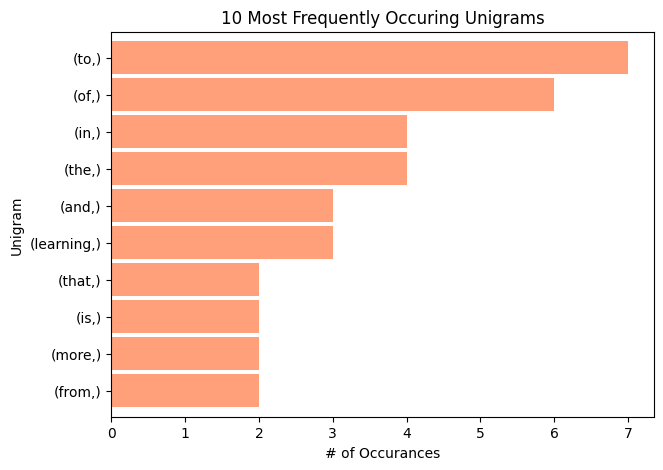

In [ ]:
unigrams[0:10].sort_values().plot.barh(color='lightsalmon', width=.9, figsize=(7, 5))
plt.title('10 Most Frequently Occuring Unigrams')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')

In [ ]:
# bigrams: n=2
bigrams = (pd.Series(nltk.ngrams(tokens, 2)).value_counts())
print(bigrams)

(that, were)             2
(the, rise)              1
(increasingly, being)    1
(ai, is)                 1
(result, ai)             1
                        ..
(tasks, that)            1
(complex, tasks)         1
(perform, complex)       1
(to, perform)            1
(to, come)               1
Name: count, Length: 105, dtype: int64


Text(0.5, 0, '# of Occurances')

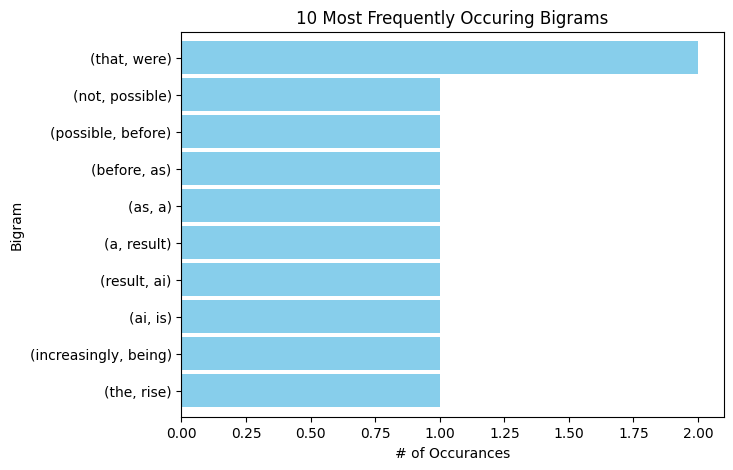

In [ ]:
bigrams[0:10].sort_values().plot.barh(color='skyblue', width=.9, figsize=(7, 5))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [ ]:
# trigrams: n=3
trigrams = (pd.Series(nltk.ngrams(tokens, 3)).value_counts())
print(trigrams)

(the, rise, of)              1
(even, more, powerful)       1
(ai, is, increasingly)       1
(result, ai, is)             1
(a, result, ai)              1
                            ..
(that, were, once)           1
(tasks, that, were)          1
(complex, tasks, that)       1
(perform, complex, tasks)    1
(years, to, come)            1
Name: count, Length: 105, dtype: int64


Text(0.5, 0, '# of Occurances')

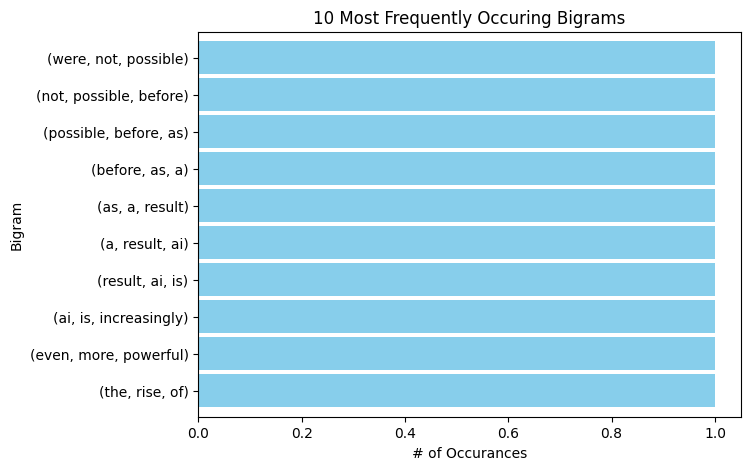

In [ ]:
trigrams[0:10].sort_values().plot.barh(color='skyblue', width=.9, figsize=(7, 5))
plt.title('10 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

### Practical Usecase

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
import pandas as pd

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load data
data = pd.read_csv("tripadvisor_hotel_reviews.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  109 non-null    object
 1   Rating  109 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
# Lowercase
data['review_lowercase'] = data['Review'].str.lower()
data.head()

,Review,Rating,review_lowercase
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso..."


In [ ]:
# Stop word removal
en_stopwords = stopwords.words('english')
en_stopwords.remove("not")

In [ ]:
data['review_no_stopwords'] = data['review_lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))
data.head()

,Review,Rating,review_lowercase,review_no_stopwords
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."


**Punctuation**

We want to remove punctation but we notice we have a few reviews with the symbol * instead of the word star. We want to keep this as it might add meaning to the review. We can do this using regular expressions.

In [ ]:
data['review_no_stopwords_no_punct'] = data.apply(lambda x: re.sub(r'[*]', '', x['review_no_stopwords']), axis=1)
data.head()

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4 experience hotel monaco seatt...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."


In [ ]:
data['review_no_stopwords_no_punct'] = data.apply(lambda x: re.sub(r'[^\w\s]', '', x['review_no_stopwords_no_punct']), axis=1)
data.head()

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4 experience hotel monaco seatt...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...


In [ ]:
# Tokenizing
data['tokenized'] = data.apply(lambda x: word_tokenize(x['review_no_stopwords_no_punct']), axis=1)
data.head()

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct,tokenized
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac..."
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."


In [ ]:
# Stemming
ps = PorterStemmer()
data['stemmed'] = data['tokenized'].apply(lambda x: [ps.stem(word) for word in x])
data.head()

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct,tokenized,stemmed
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, room, not, 4, experi, hotel, monaco, se..."
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
data["lemmatized"] = data["tokenized"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
data.head()

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct,tokenized,stemmed,lemmatized
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, room, not, 4, experi, hotel, monaco, se...","[nice, room, not, 4, experience, hotel, monaco..."
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


In [ ]:
# N-grams
tokens_clean = sum(data['lemmatized'], [])

In [ ]:
# unigrams: n=1
unigrams = (pd.Series(nltk.ngrams(tokens_clean, 1)).value_counts())
unigrams

,count
"(hotel,)",292
"(room,)",275
"(great,)",126
"(not,)",122
"(stay,)",95
...,...
"(travelodge,)",1
"(la,)",1
"(smackagainst,)",1
"(stomach,)",1


In [ ]:
# bigrams: n=2
bigrams = (pd.Series(nltk.ngrams(tokens_clean, 2)).value_counts())
bigrams

,count
"(great, location)",24
"(space, needle)",21
"(hotel, monaco)",16
"(great, view)",12
"(staff, friendly)",12
...,...
"(like, guest)",1
"(didnt, make)",1
"(personnel, didnt)",1
"(minute, stay)",1


### Vectorizing Text

transforms documents into numerical representations

#### Bag-of-Words (BoW)

Bag of words featurization quantifies the frequency of words in text documents for processing in machine learning models.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [2]:
# Example text corpus
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

In [3]:
# Create an instance of the CountVectorizer
vectorizer = CountVectorizer()

In [7]:
# Fit and transform the corpus into a document-term matrix
countvec_fit = vectorizer.fit_transform(corpus)

In [8]:
# Print the vocabulary and the document-term matrix
print("Vocabulary:", vectorizer.get_feature_names_out())
print("Document-Term Matrix:")
print(countvec_fit.toarray())

Vocabulary: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
Document-Term Matrix:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [11]:
bag_of_words = pd.DataFrame(countvec_fit.toarray(), columns = vectorizer.get_feature_names_out())
bag_of_words

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


#### Term Frequency-Inverse Document Frequency (TF-IDF)

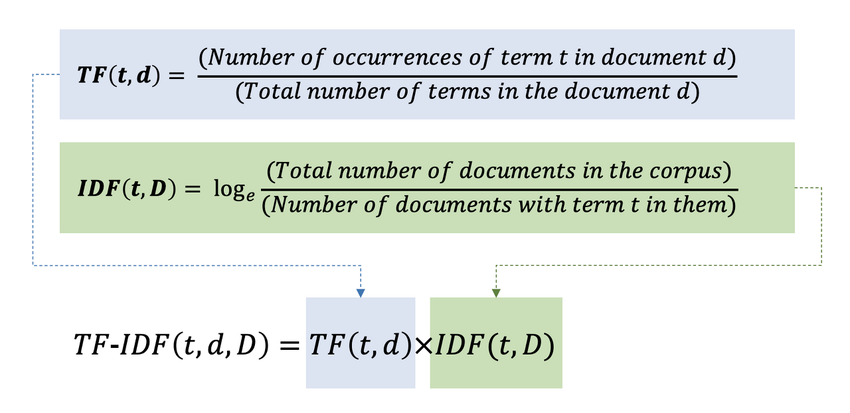

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [13]:
# Example text corpus
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

In [14]:
# Create an instance of the TfidfVectorizer
vectorizer = TfidfVectorizer()

In [16]:
# Fit and transform the corpus into a TF-IDF matrix
tf_idf = vectorizer.fit_transform(corpus)

In [17]:
tf_idf_data = pd.DataFrame(tf_idf.toarray(), columns = vectorizer.get_feature_names_out())
tf_idf_data

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


#### Word Embeddings

capture semantic relationships between words, allowing models to understand and represent words in a continuous vector space where similar words are close to each other

In [18]:
import gensim.downloader as api

In [19]:
# Load the pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [20]:
# Get the word vector for a specific word
word_vector = model["king"]

In [22]:
# Print the word vector
print("Word Vector for 'king':")
print(word_vector[:10])

Word Vector for 'king':
[ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125]


#### Document Embeddings

Document embeddings are different from word embeddings in that they give you one embedding for an entire text, whereas word embeddings give you embeddings for individual words.

In [23]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
# Example documents
documents = [
    TaggedDocument(words=['This', 'is', 'the', 'first', 'document'], tags=['doc1']),
    TaggedDocument(words=['This', 'document', 'is', 'the', 'second', 'document'], tags=['doc2']),
    TaggedDocument(words=['And', 'this', 'is', 'the', 'third', 'one'], tags=['doc3']),
    TaggedDocument(words=['Is', 'this', 'the', 'first', 'document'], tags=['doc4']),
]

In [25]:
# Train the Doc2Vec model
model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, epochs=20)

In [26]:
# Get the document vector for a specific document
doc_vector = model.infer_vector(['This', 'is', 'the', 'first', 'document'])

In [27]:
# Print the document vector
print("Document Vector for 'doc1':")
print(doc_vector)

Document Vector for 'doc1':
[-4.7014044e-03 -4.8341909e-03 -2.1301177e-03  2.7209832e-03
  4.7919285e-03  7.6448533e-04  4.2162756e-03 -1.9978343e-03
 -1.5454055e-03 -4.9753375e-03 -2.6316650e-03  3.7557278e-03
 -7.9201203e-04  2.9474720e-03  2.9439530e-03 -4.6406072e-03
  2.0733317e-03  2.1376435e-03 -1.7490097e-03 -3.1586366e-03
 -3.0206731e-03 -3.8387673e-03  1.9114086e-04 -3.5988614e-03
 -2.7679920e-03  4.9545662e-03  3.9252862e-03 -2.4918641e-03
 -1.9097613e-03  3.1710339e-03  7.8295340e-04  3.7416986e-03
  4.5753531e-03  5.9976082e-05  3.2024079e-03  4.1534318e-04
 -2.0274073e-03 -6.6298257e-05 -6.6387298e-04 -3.0336760e-03
 -4.3207062e-03 -3.1007454e-03 -3.9206264e-03  2.5058377e-03
  3.2007092e-04 -3.0771389e-03  4.5933309e-03  6.5590117e-05
 -3.8444872e-03 -2.7468286e-03  2.4753455e-03  8.0087915e-04
 -1.7650701e-03  6.9531845e-04 -2.8044279e-03 -4.5517911e-03
 -3.5509132e-03  1.0272100e-03 -4.1100867e-03  4.5762500e-03
 -8.2885835e-04  4.1454746e-03  3.7093516e-03 -2.2001085e